#### Gaussian Transformation

Some machine learning models like linear and logistic regression assume that the variables are normally distributed. Often, variables are not normally distributed, but, transforming the variables to map their distribution to a Gaussian distribution may, and often does, boost the performance of the machine learning algorithm.

If a variable is not normally distributed, it is often possible to find a mathematical transformation to normalize its distribution.

**How can we transform variables so that they follow a normal distribution?**

The most commonly used methods to transform variables are:

- Logarithmic transformation - $np.log(X)$
- Reciprocal transformation - $ \frac{1}{X}$
- Square root transformation - $\sqrt{X}$
- Exponential transformation (more general, you can use any exponent)
- Box-Cox transformation

\begin{split}x_i^{(\lambda)} =
\begin{cases}
\dfrac{x_i^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0, \\[8pt]
\ln{(x_i)} & \text{if } \lambda = 0,
\end{cases}\end{split}

- Yeo-Johnson transformation

\begin{split}x_i^{(\lambda)} =
\begin{cases}
 [(x_i + 1)^\lambda - 1] / \lambda & \text{if } \lambda \neq 0, x_i \geq 0, \\[8pt]
\ln{(x_i + 1)} & \text{if } \lambda = 0, x_i \geq 0 \\[8pt]
-[(-x_i + 1)^{2 - \lambda} - 1] / (2 - \lambda) & \text{if } \lambda \neq 2, x_i < 0, \\[8pt]
 - \ln (- x_i + 1) & \text{if } \lambda = 2, x_i < 0
\end{cases}\end{split}


Resources for [Box-COx and Yeo-Johnson](https://scikit-learn.org/stable/modules/preprocessing.html#mapping-to-a-gaussian-distribution) transformation.

Briefly, the Box-Cox transformation is an adaptation of the exponential transformation, scanning through various exponents, and it already represents the untransformed variable, as well as the log transformed, reciprocal, square and cube root transformed, as the lambda varies across the range of -5 to 5. So by doing Box-Cox transformation, in a way, we are evaluating all the other transformations and choosing the best one. Box-Cox can only be applied to positive variables.

Yeo-Johnson is a modification of the Box-Cox transformation so that it can be applied as well to non-positive variables

Dataset: House price

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stats

In [2]:
# load the data
data = pd.read_csv('../datasets/houseprice.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


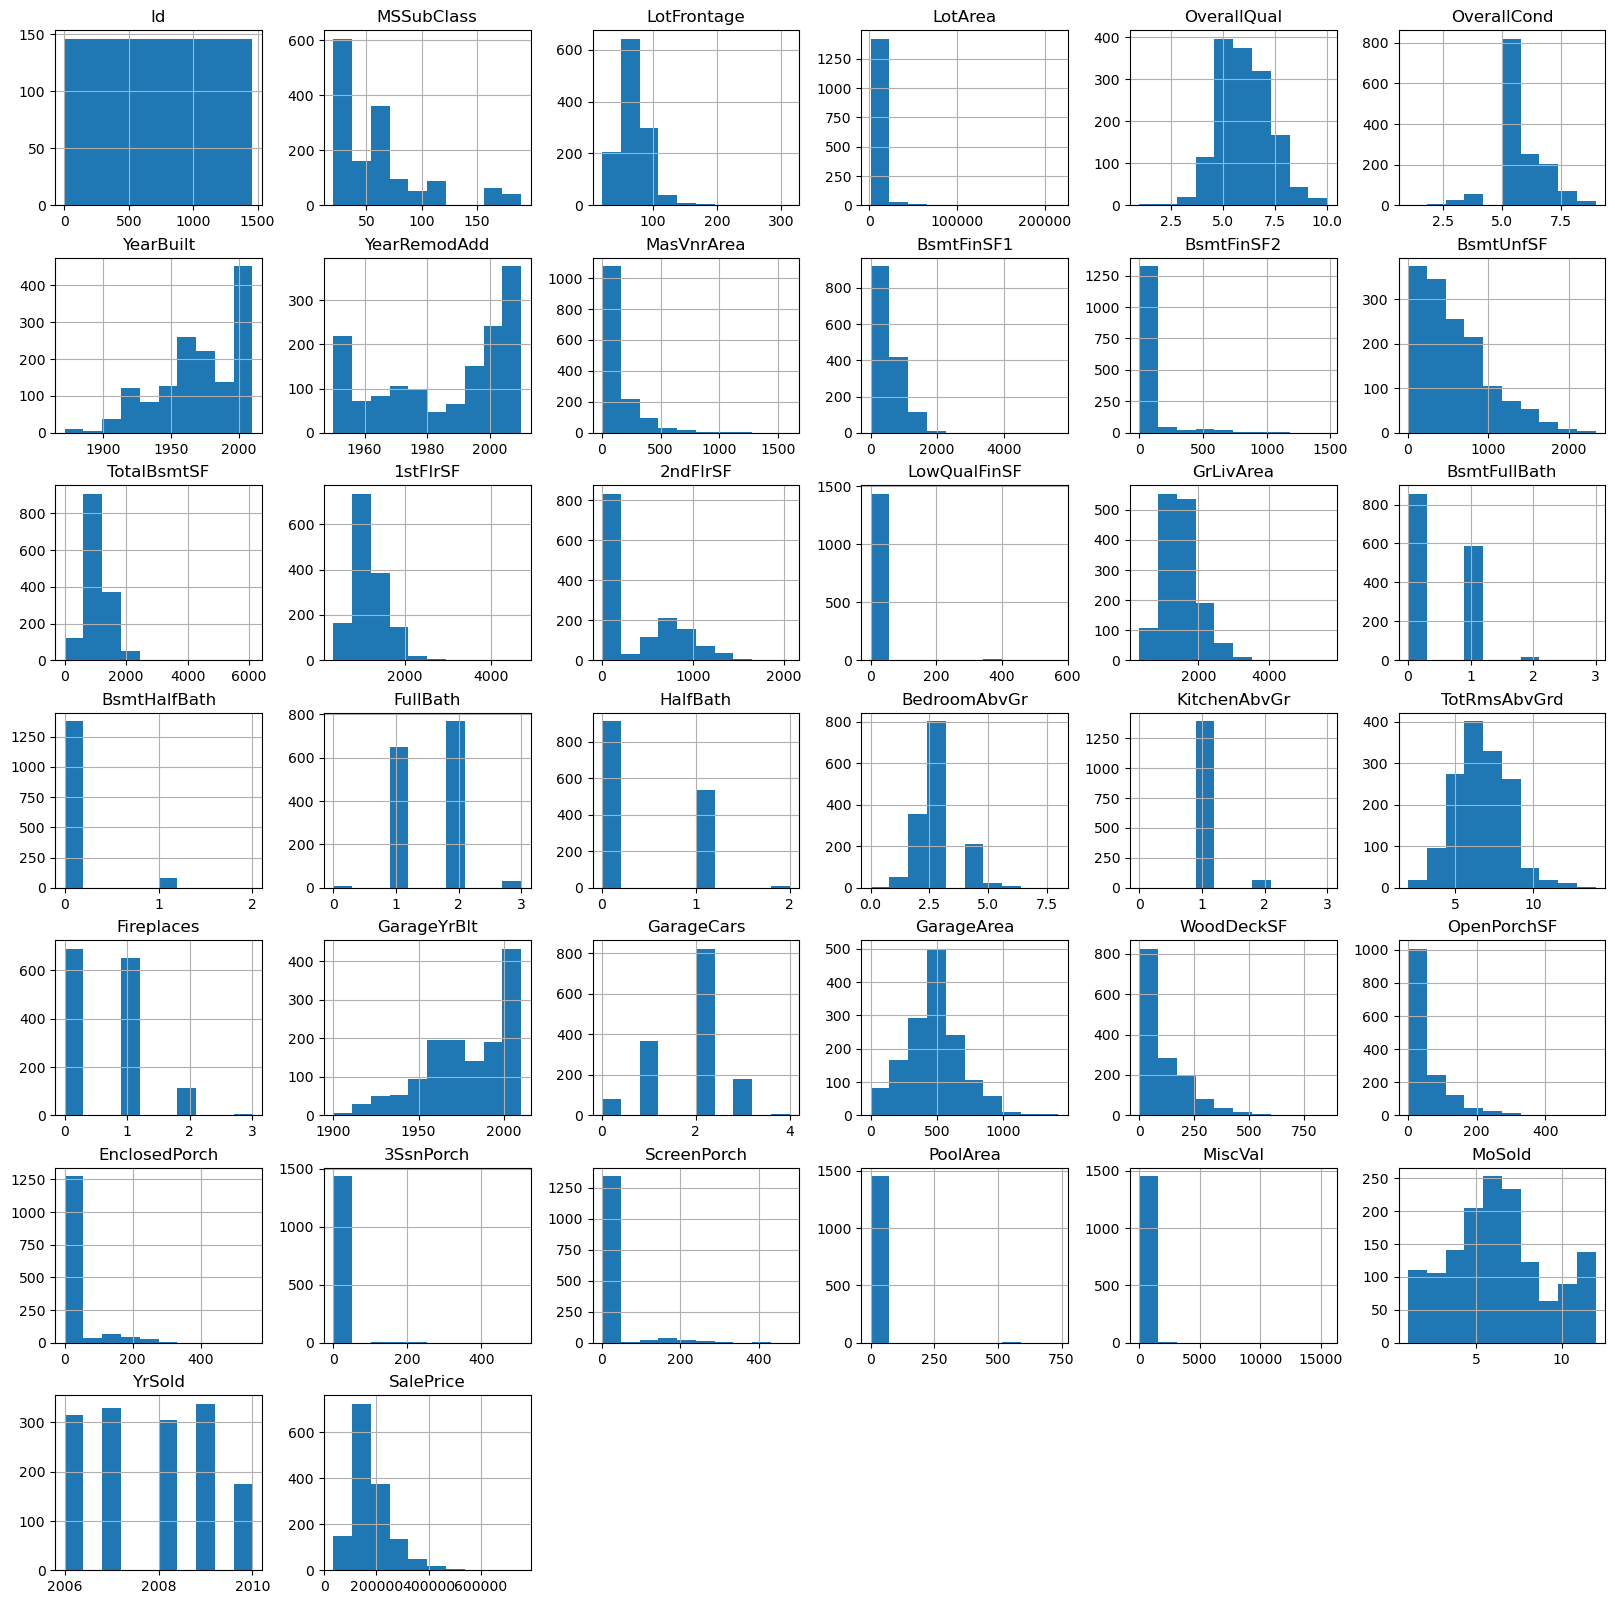

In [3]:
# let's explore the distribution of the numerical variables
data.hist(figsize=(20,20))
plt.show()

**Normality Diagnosis**

To visualise the distribution of the variables, we plot a histogram and a Q-Q plot. In the Q-Q pLots, if the variable is normally distributed, the values of the variable should fall in a 45 degree line when plotted against the theoretical quantiles.

In [4]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

**Original Distibution**


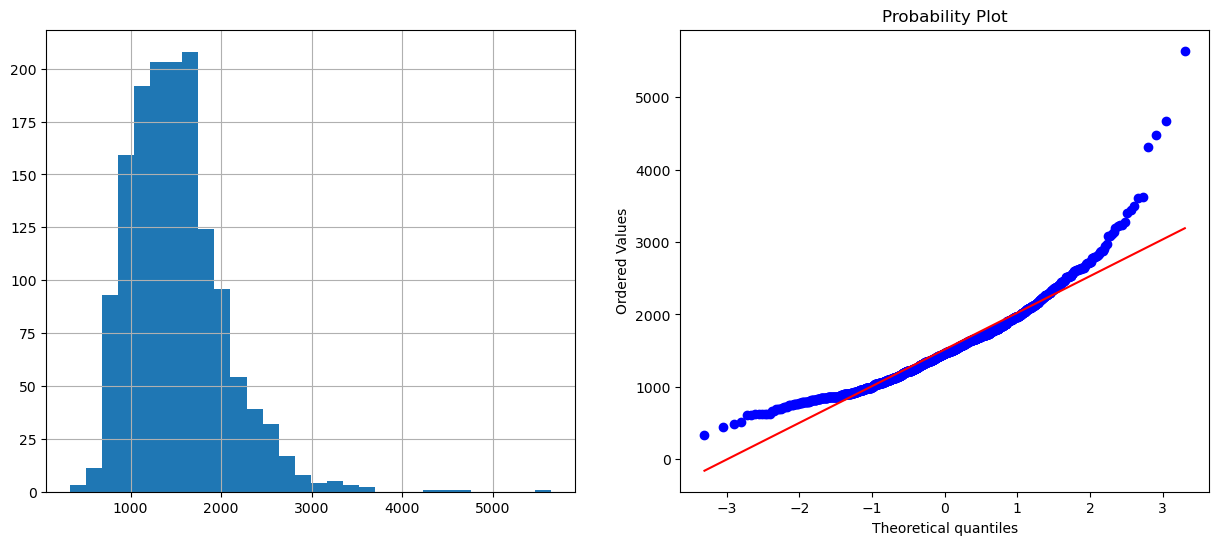

In [5]:
diagnostic_plots(data, 'GrLivArea')

We can see in the plots that the variable is not normally distributed. The values depart from the red line towards the ends of the distribution and we can see in the histogram that it is skewed to the right.

**Logarithmic transformation**

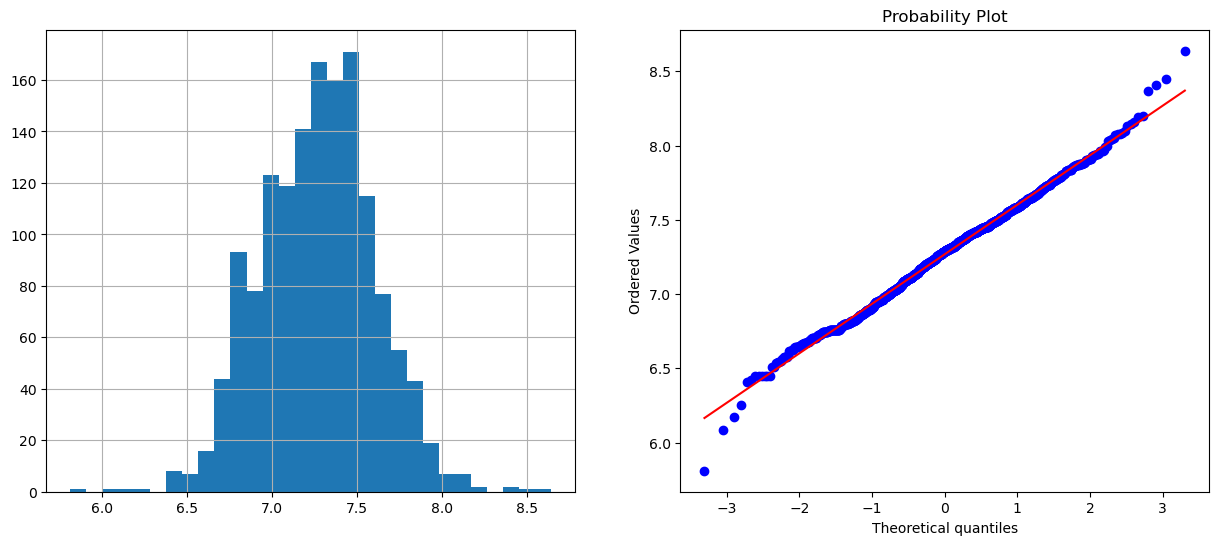

In [6]:
### Logarithmic transformation

data['GrLivArea_log'] = np.log(data['GrLivArea'])

diagnostic_plots(data, 'GrLivArea_log')

The logarithmic transformation returned a more Gaussian for this variable.

**Reciprocal transformation**

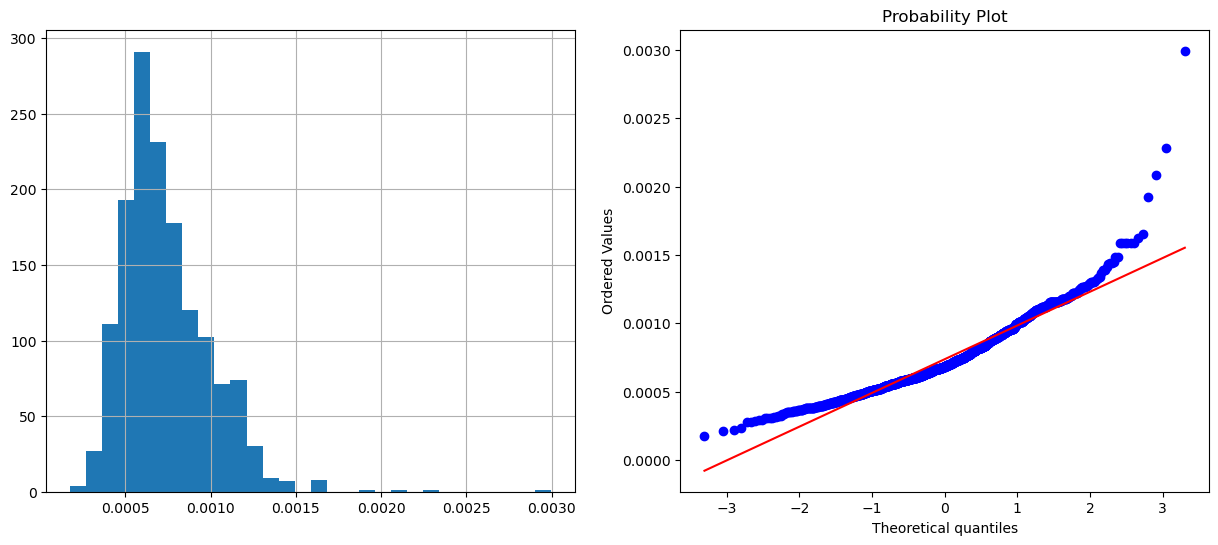

In [7]:
### Reciprocal transformation
data['GrLivArea_reciprocal'] = 1 / (data['GrLivArea']) 
# np.reciprocal(data['GrLivArea'])
diagnostic_plots(data, 'GrLivArea_reciprocal')

The reciprocal transformation was not useful to transform this variable.

**Square root transformation**

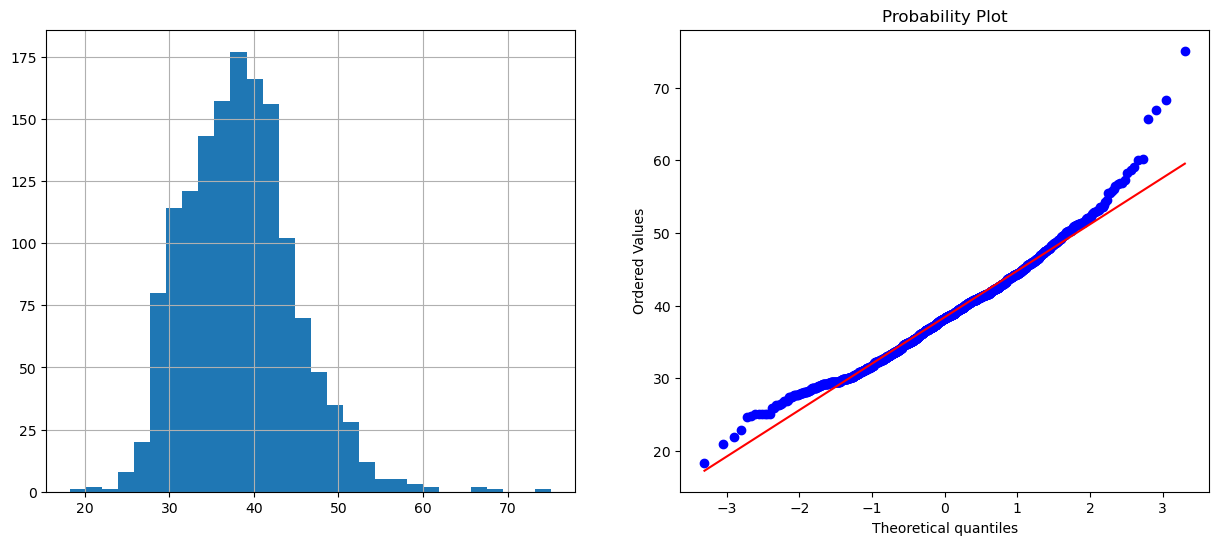

In [8]:
data['GrLivArea_sqr'] = data['GrLivArea']**(1/2) 

# np.power(data['GrLivArea'], 1/2), np.sqrt(data['GrLivArea'])

diagnostic_plots(data, 'GrLivArea_sqr')

The square root transformation offers a good alternative to normalise this variable.

**Exponential**

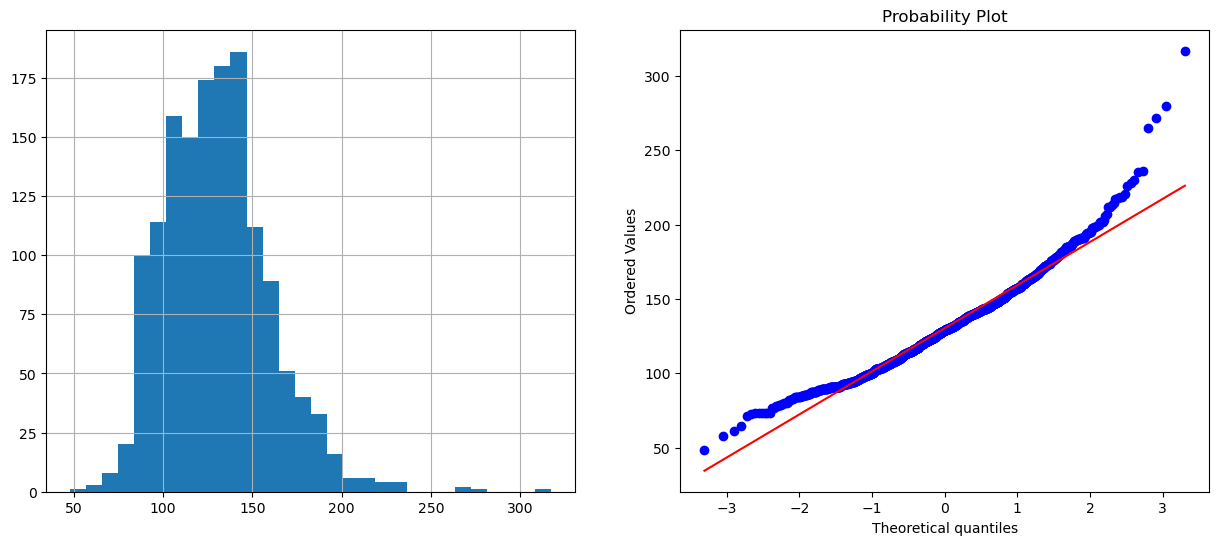

In [9]:
data['GrLivArea_exp'] = data['GrLivArea']**(1/1.5) # you can vary the exponent as needed

# np.power(data['GrLivArea'], any exponent we want)

diagnostic_plots(data, 'GrLivArea_exp')

The exponential transformation did not work so nicely for this variable.

**Box-Cox transformation**

The Box-Cox transformation is defined as in cell 1.


where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

Briefly, for each λ (the transformation tests several λs), the correlation coefficient of the Probability Plot (Q-Q plot below, correlation between ordered values and theoretical quantiles) is calculated (this optimisation equation actually varies with the implementation).

The value of λ corresponding to the maximum correlation on the plot is then the optimal choice for λ.

In python, we can evaluate and obtain the best λ with the stats.boxcox function from the package scipy.

Optimal λ:  0.006304924353543215


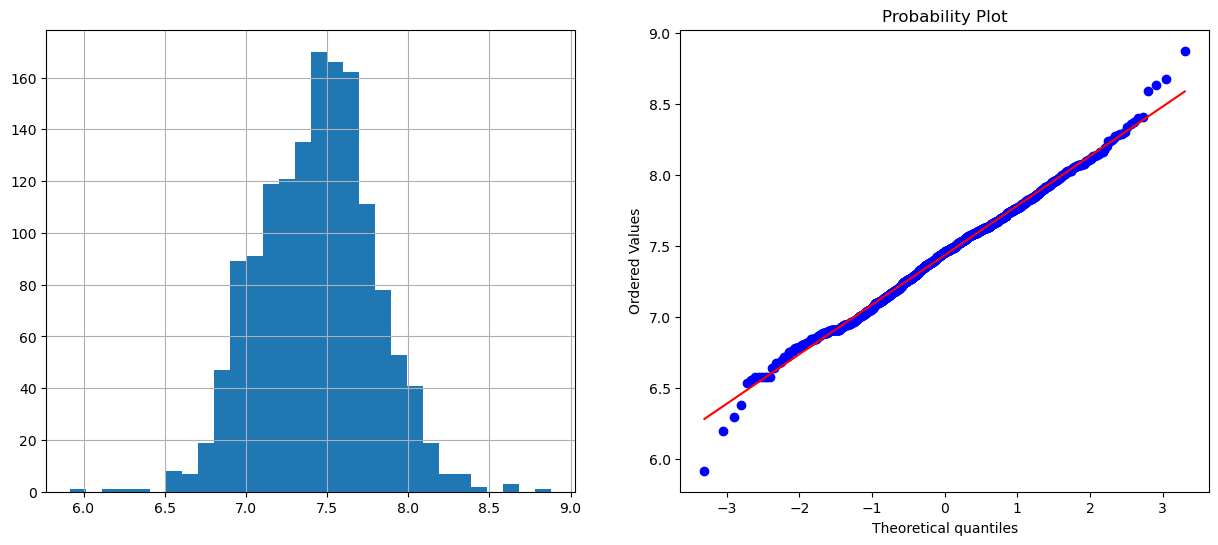

In [10]:
data['GrLivArea_boxcox'], param = stats.boxcox(data['GrLivArea']) 

print('Optimal λ: ', param)

diagnostic_plots(data, 'GrLivArea_boxcox')

Yeo-Johnson
Yeo-Johnson is the same as Box-Cox for the positive values of the variable, but it has different equations for the negative values of the variable as described [here](https://www.stat.umn.edu/arc/yjpower.pdf)

Again, the function searches over a bunch of λ and selects the one that returns the best fit to a normal distribution.

Optimal λ:  0.005539641278705955


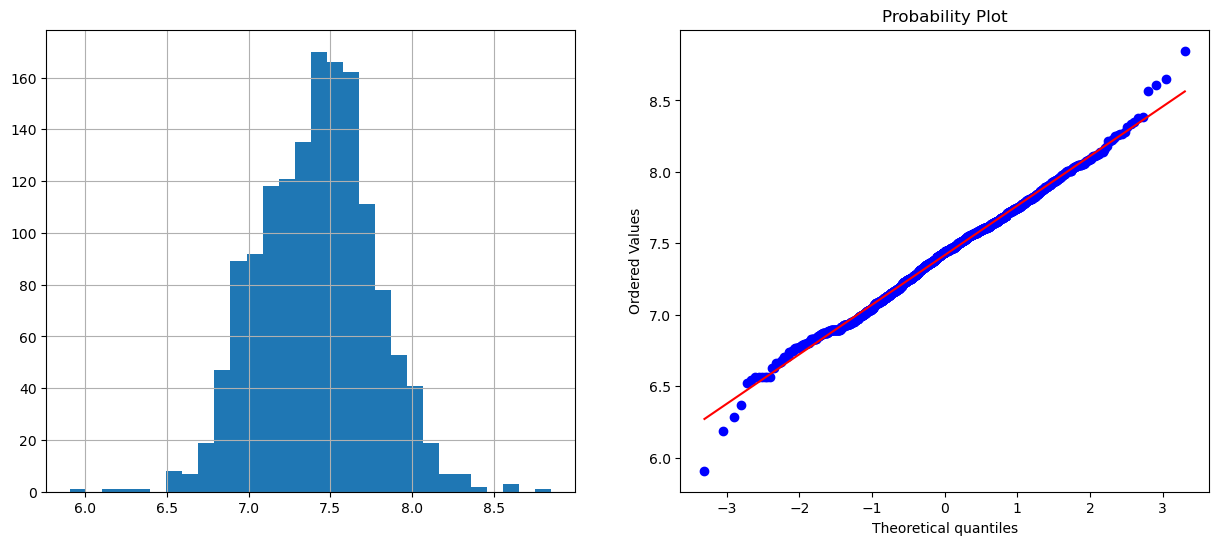

In [12]:
# to avoid a NumPy error

data['GrLivArea'] = data['GrLivArea'].astype('float')
data['GrLivArea_yeojohnson'], param = stats.yeojohnson(data['GrLivArea']) 

print('Optimal λ: ', param)

diagnostic_plots(data, 'GrLivArea_yeojohnson')


We can see that after the transformation, the quantiles are somewhat more aligned over the 45 degree line with the theoreical quantiles of the Gaussian distribution.

#### Scikit Learn 

Scikit-learn has recently released transformers to do Gaussian mappings as they call the variable transformations. The PowerTransformer allows to do Box-Cox and Yeo-Johnson transformation. With the FunctionTransformer, we can specify any function we want.

The transformers per se, do not allow to select columns, but we can do so using a third transformer, the ColumnTransformer

Another thing to keep in mind is that Scikit-learn transformers return NumPy arrays, and not dataframes, so we need to be mindful of the order of the columns not to mess up with our features.


**Important**

Box-Cox and Yeo-Johnson transformations need to learn their parameters from the data. Therefore, as always, before attempting any transformation it is important to divide the dataset into train and test set.

In this notebook, I will not do so for simplicity, but when using this transformation in your pipelines.


In [13]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer

In [14]:
data = pd.read_csv('../datasets/houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
cols = []
for col in data.columns:
    if data[col].dtypes != 'O' and col != 'Id':  # if the variable is numerical
        if np.sum(np.where(data[col] <= 0, 1, 0)) == 0:  # if the variable is positive
            cols.append(col)  # append variable to the list

cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'MoSold',
 'YrSold',
 'SalePrice']

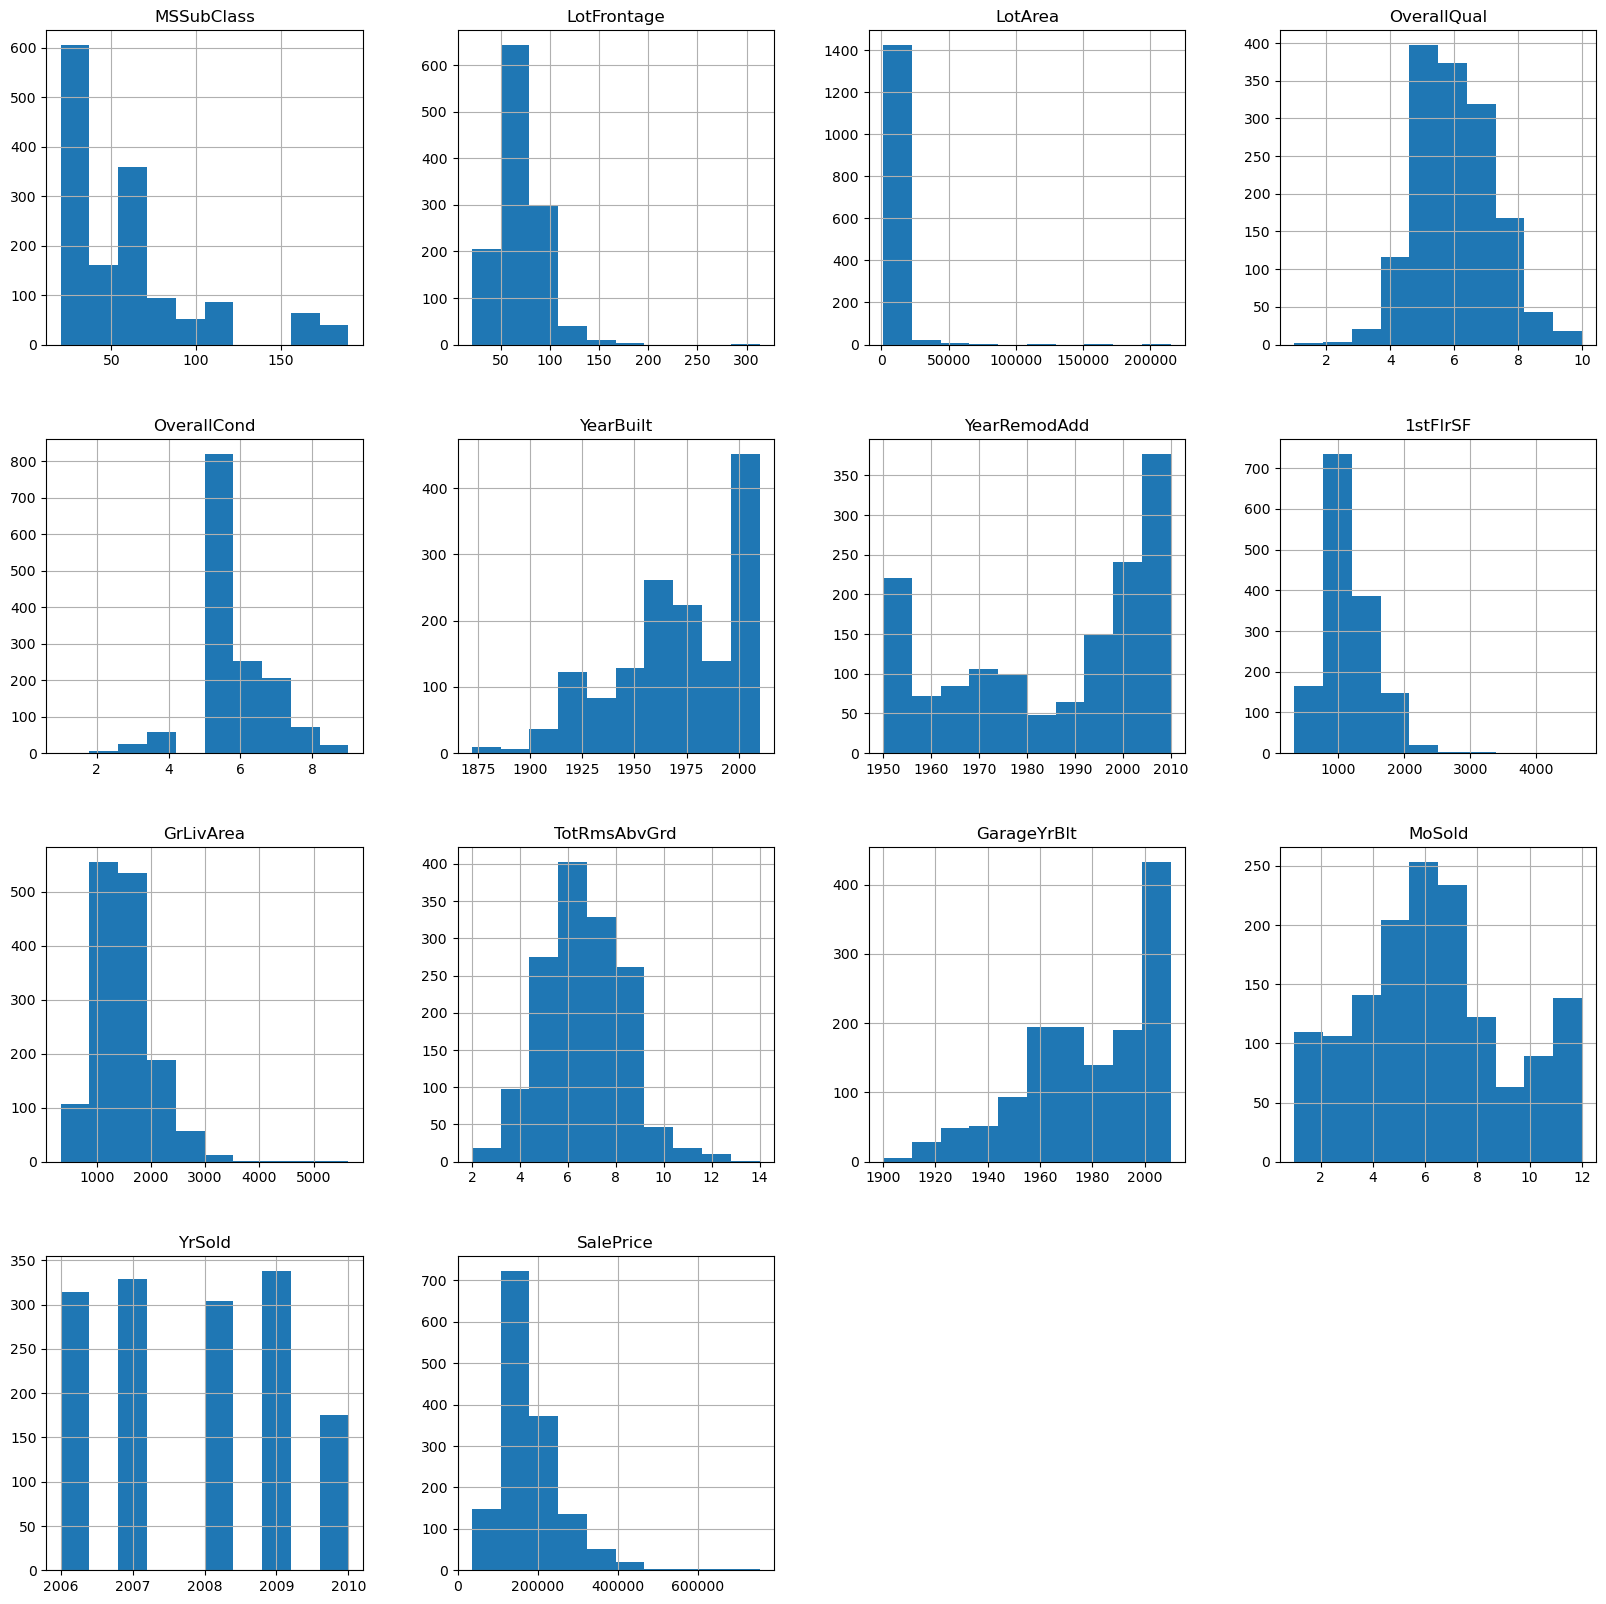

In [19]:
# let's explore the distribution of the numerical variables

data[cols].hist(figsize=(20,20))
plt.show()

**Plots to examine the normality**

To visualise the distribution of the variables, we plot a histogram and a Q-Q plot. In the Q-Q pLots, if the variable is normally distributed, the values of the variable should fall in a 45 degree line when plotted against the theoretical quantiles.

In [20]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

**Logarithmic transformation**

In [21]:
# create a log transformer

transformer = FunctionTransformer(np.log, validate=True)

In [22]:
# transform all the numerical and positive variables

data_t = transformer.transform(data[cols].fillna(1))

C:\Users\cssar\miniconda3\envs\whiskey_pt\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [23]:
# Scikit-learn returns NumPy arrays, so capture in dataframe
# note that Scikit-learn will return an array with
# only the columns indicated in cols

data_t = pd.DataFrame(data_t, columns = cols)

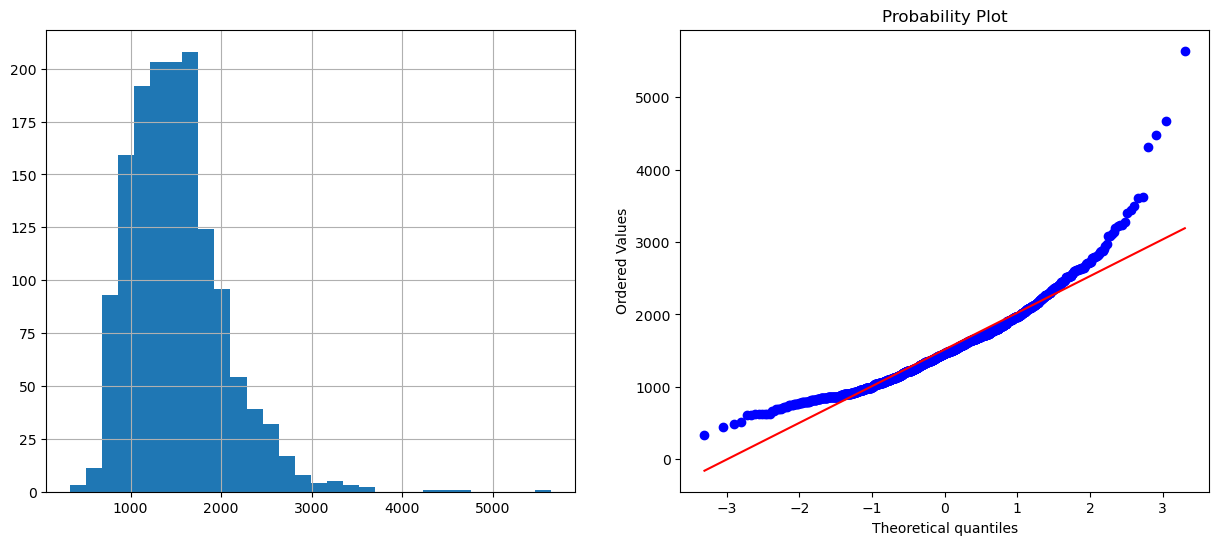

In [24]:
# original distribution

diagnostic_plots(data, 'GrLivArea')

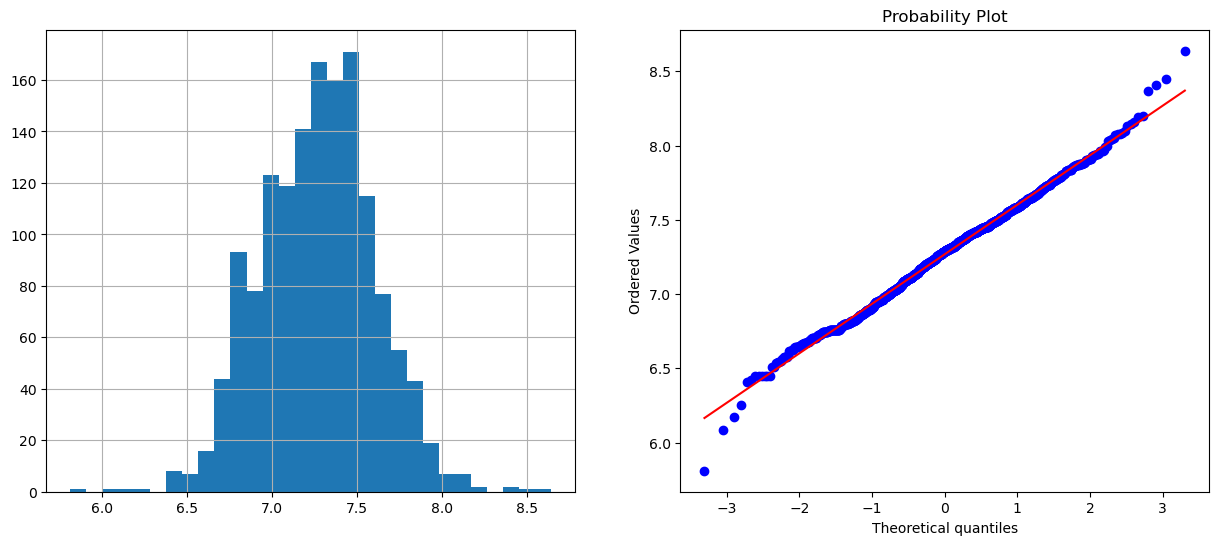

In [25]:
# transformed distribution

diagnostic_plots(data_t, 'GrLivArea')

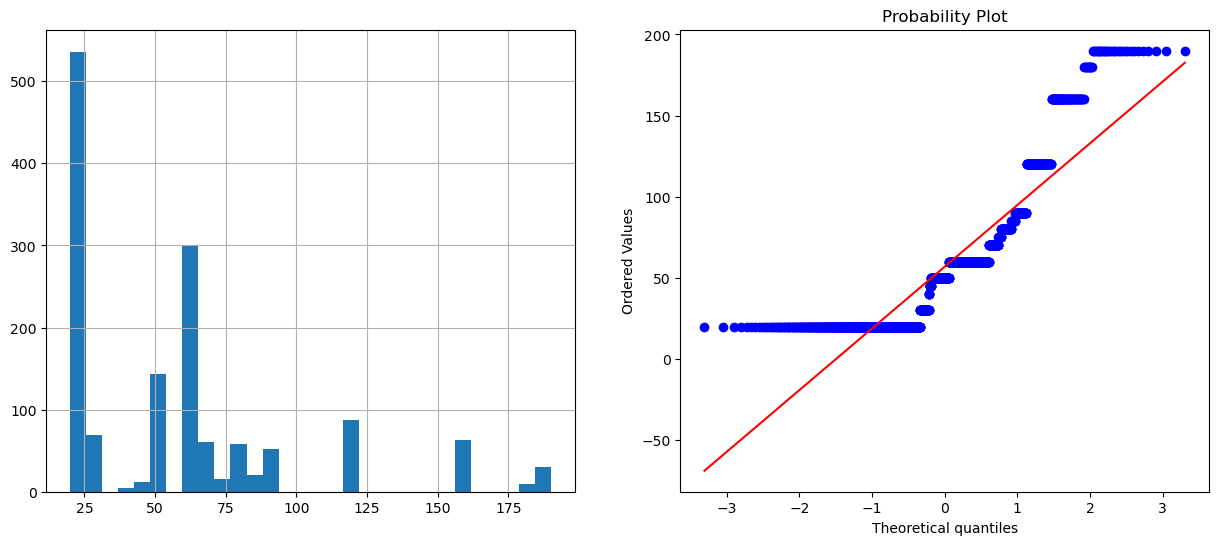

In [26]:
# original distribution

diagnostic_plots(data, 'MSSubClass')

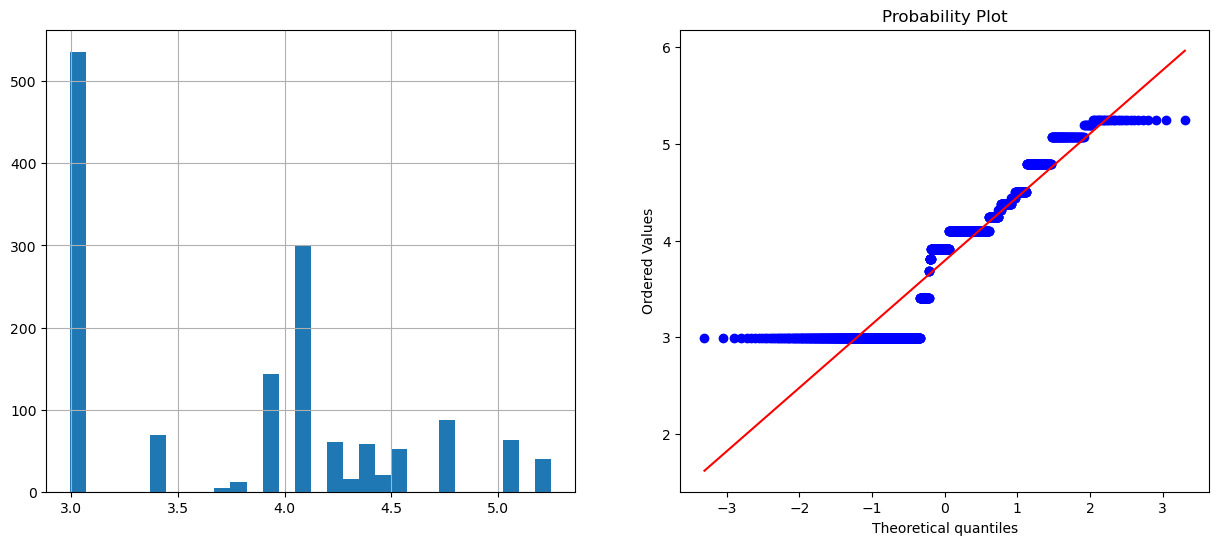

In [27]:
# transformed distribution

diagnostic_plots(data_t, 'MSSubClass')

**Reciprocal transformation**

In [28]:
# create the transformer
transformer = FunctionTransformer(lambda x: 1/x, validate=True)

# also
# transformer = FunctionTransformer(np.reciprocal, validate=True)

# transform the positive variables
data_t = transformer.transform(data[cols].fillna(1))

# re-capture in a dataframe
data_t = pd.DataFrame(data_t, columns = cols)

C:\Users\cssar\miniconda3\envs\whiskey_pt\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


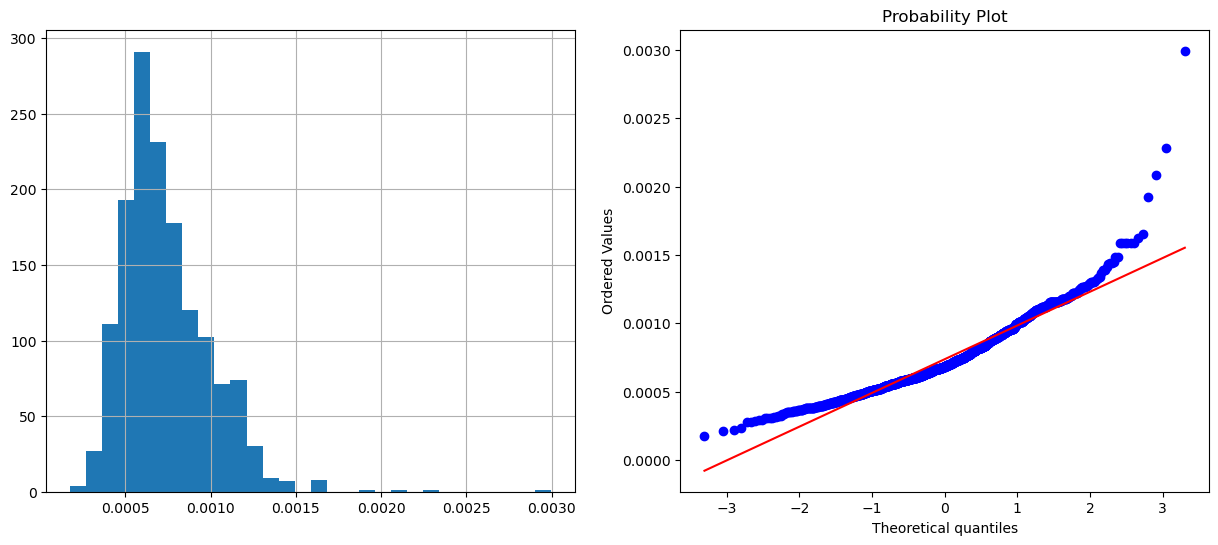

In [29]:
# transformed variable

diagnostic_plots(data_t, 'GrLivArea')

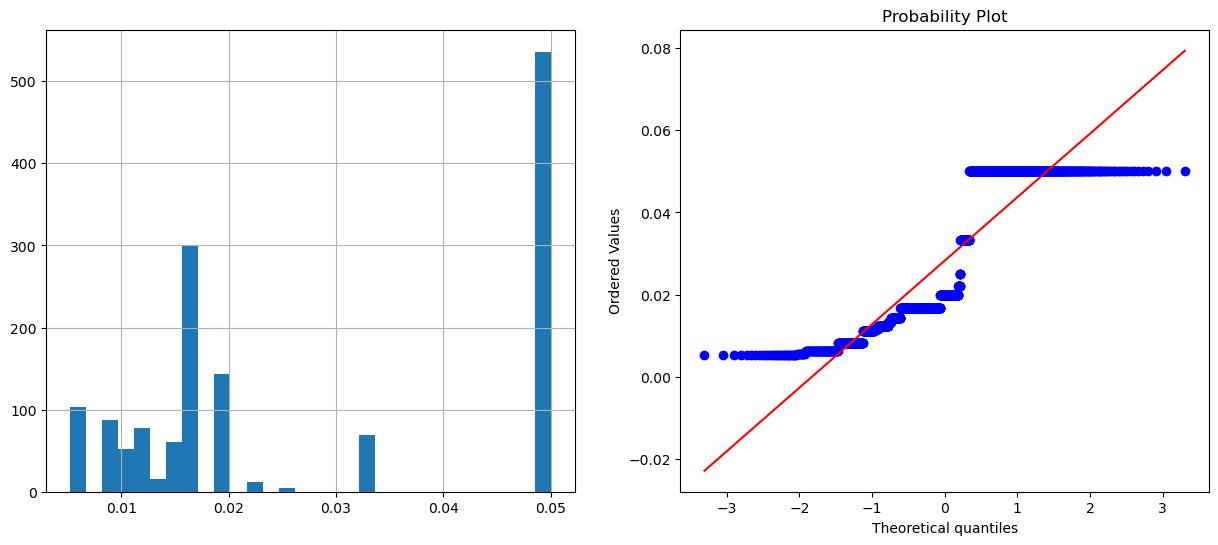

In [30]:
# transformed variable

diagnostic_plots(data_t, 'MSSubClass')

**Square root transformation**

In [31]:
transformer = FunctionTransformer(lambda x: x**(1/2), validate=True)

# also
# transformer = FunctionTransformer(np.sqrt, validate=True)

data_t = transformer.transform(data[cols].fillna(1))

data_t = pd.DataFrame(data_t, columns = cols)

C:\Users\cssar\miniconda3\envs\whiskey_pt\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


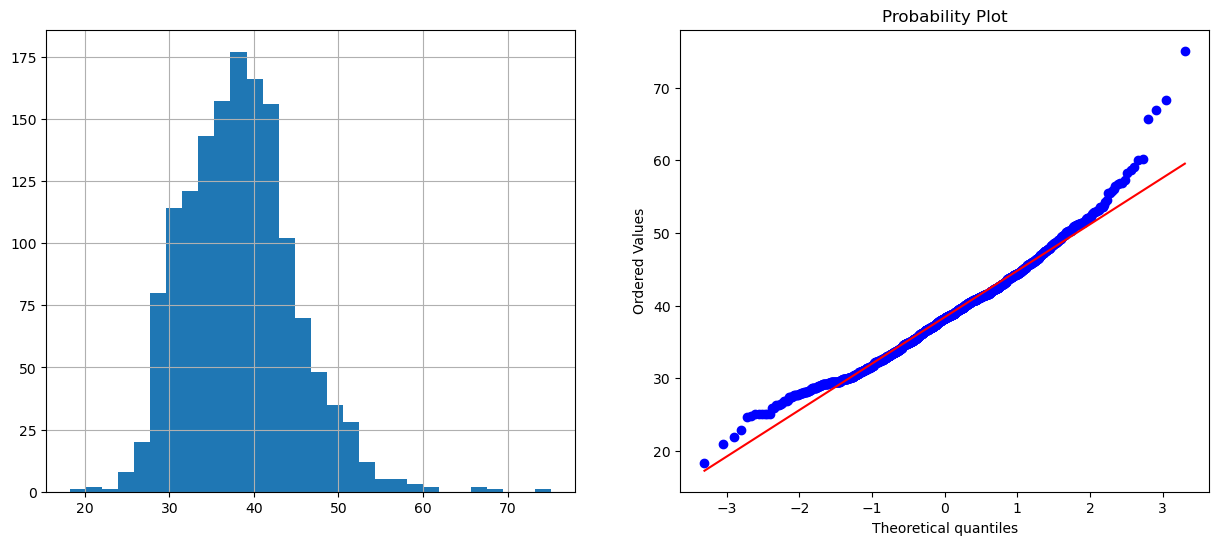

In [33]:
diagnostic_plots(data_t, 'GrLivArea')

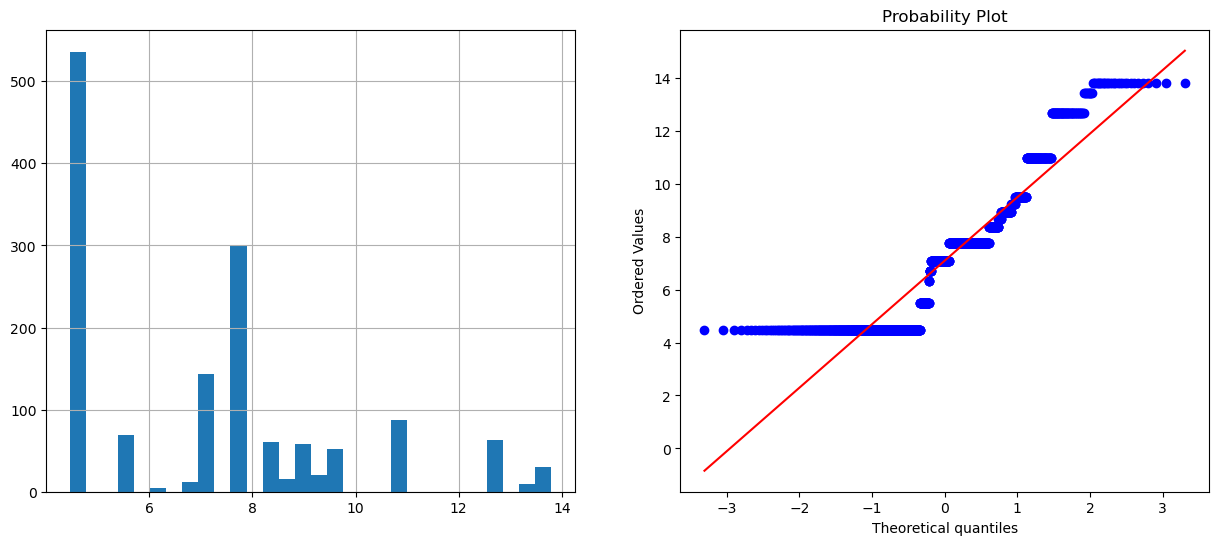

In [34]:
diagnostic_plots(data_t, 'MSSubClass')

**Exponential**

In [35]:
transformer = FunctionTransformer(lambda x: x**(1/1.2), validate=True)

data_t = transformer.transform(data[cols].fillna(1))

data_t = pd.DataFrame(data_t, columns = cols)

C:\Users\cssar\miniconda3\envs\whiskey_pt\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


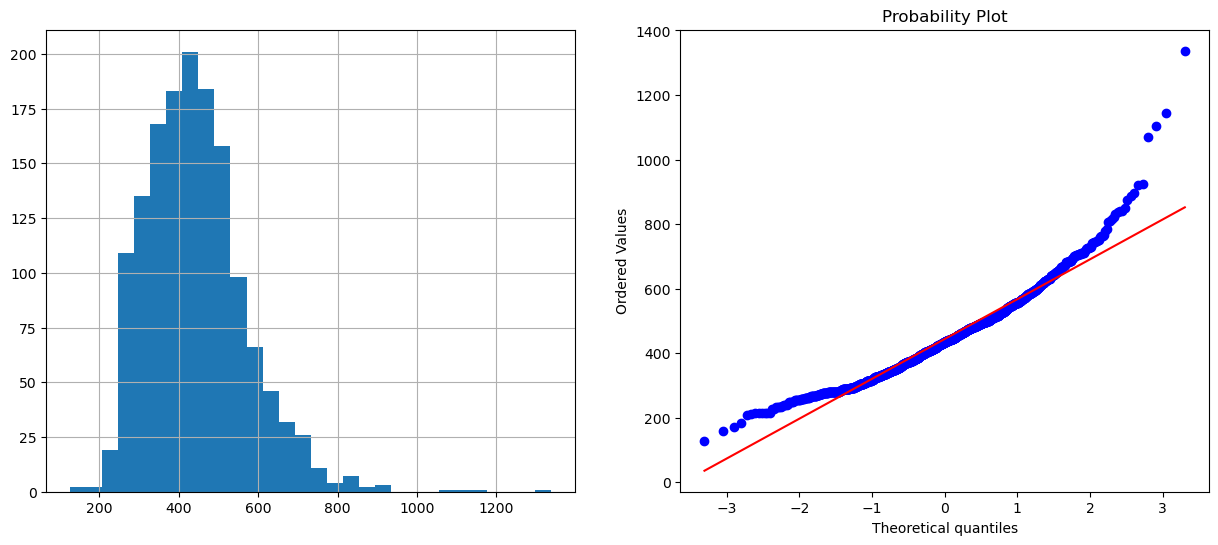

In [36]:
diagnostic_plots(data_t, 'GrLivArea')

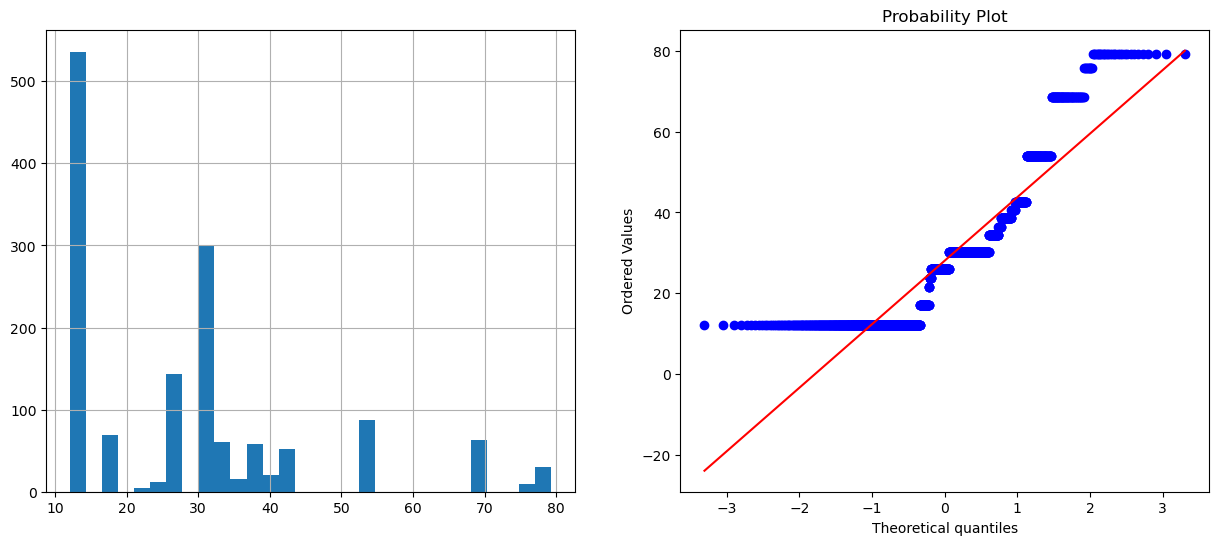

In [37]:
diagnostic_plots(data_t, 'MSSubClass')

**Box-Cox transformation**

In [38]:
# create the transformer
transformer = PowerTransformer(method='box-cox', standardize=False)

# find the optimal lambda using the train set
transformer.fit(data[cols].fillna(1))

# transform the data
data_t = transformer.transform(data[cols].fillna(1))

# capture data in a dataframe
data_t = pd.DataFrame(data_t, columns = cols)

C:\Users\cssar\miniconda3\envs\whiskey_pt\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\cssar\miniconda3\envs\whiskey_pt\lib\site-packages\scipy\stats\morestats.py:914: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)


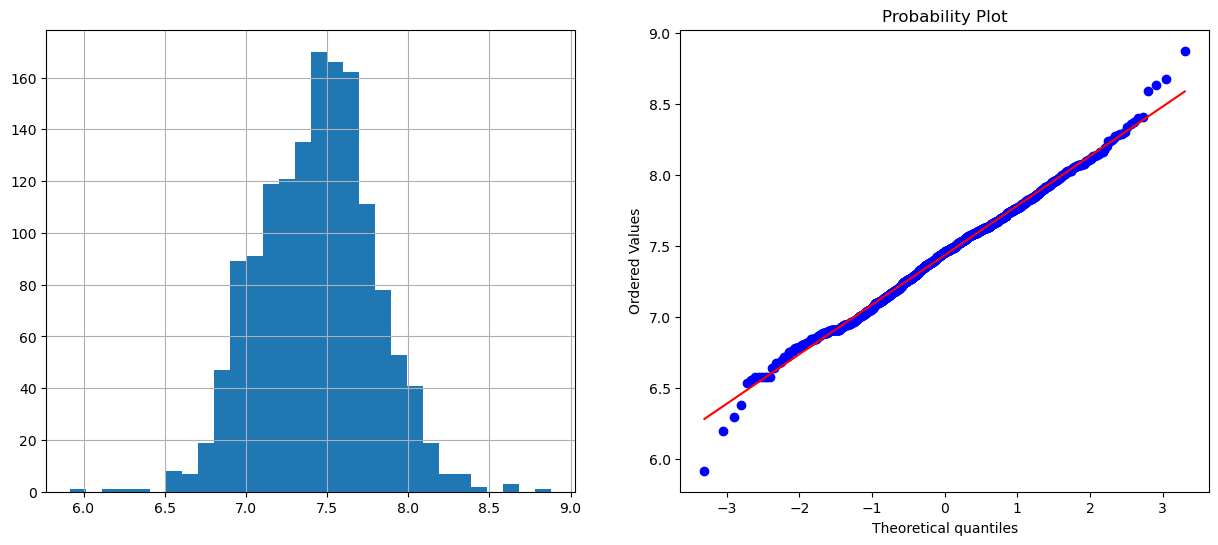

In [39]:
diagnostic_plots(data_t, 'GrLivArea')

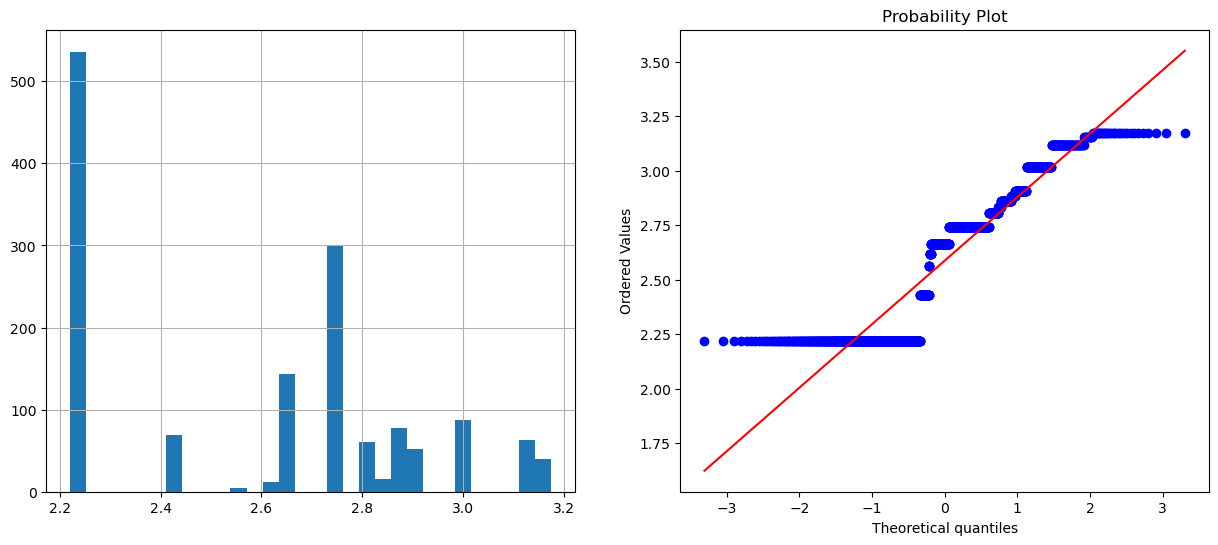

In [40]:
diagnostic_plots(data_t, 'MSSubClass')

**Yeo-Johnson**

Yeo-Johnson is an adaptation of Box-Cox that can also be used in negative value variables. So let's expand the list of variables for the demo, to include those that contain zero and negative values as well.

In [42]:
cols = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
    'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
    'MiscVal', 'SalePrice'
]

In [43]:
# call the transformer
transformer = PowerTransformer(method='yeo-johnson', standardize=False)

# learn the lambda from the train set
transformer.fit(data[cols].fillna(1))

# transform the data
data_t = transformer.transform(data[cols].fillna(1))

# capture data in a dataframe
data_t = pd.DataFrame(data_t, columns = cols)

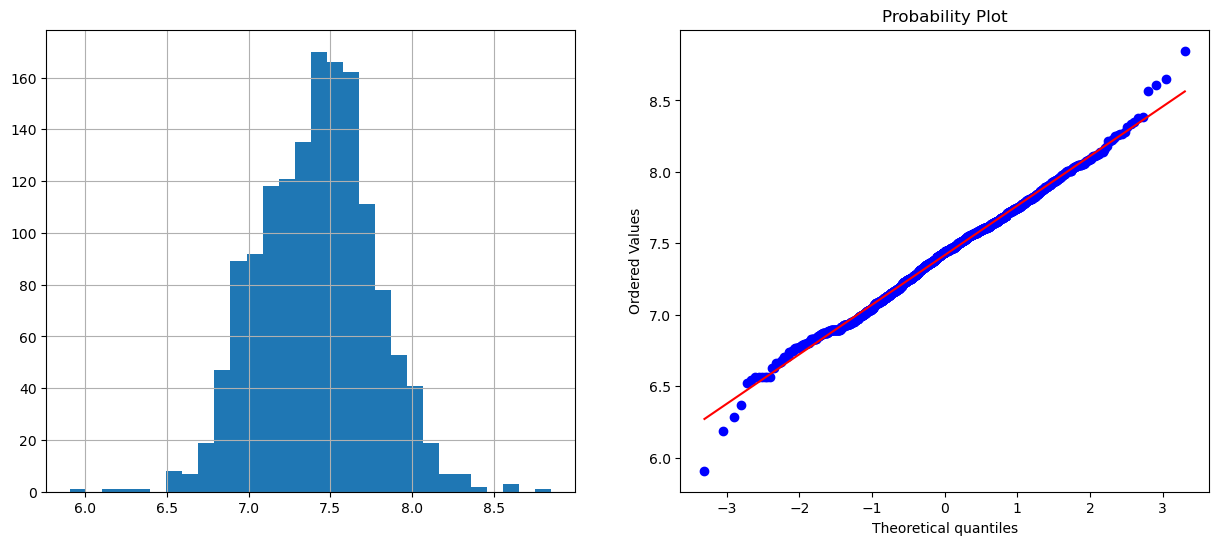

In [44]:
diagnostic_plots(data_t, 'GrLivArea')

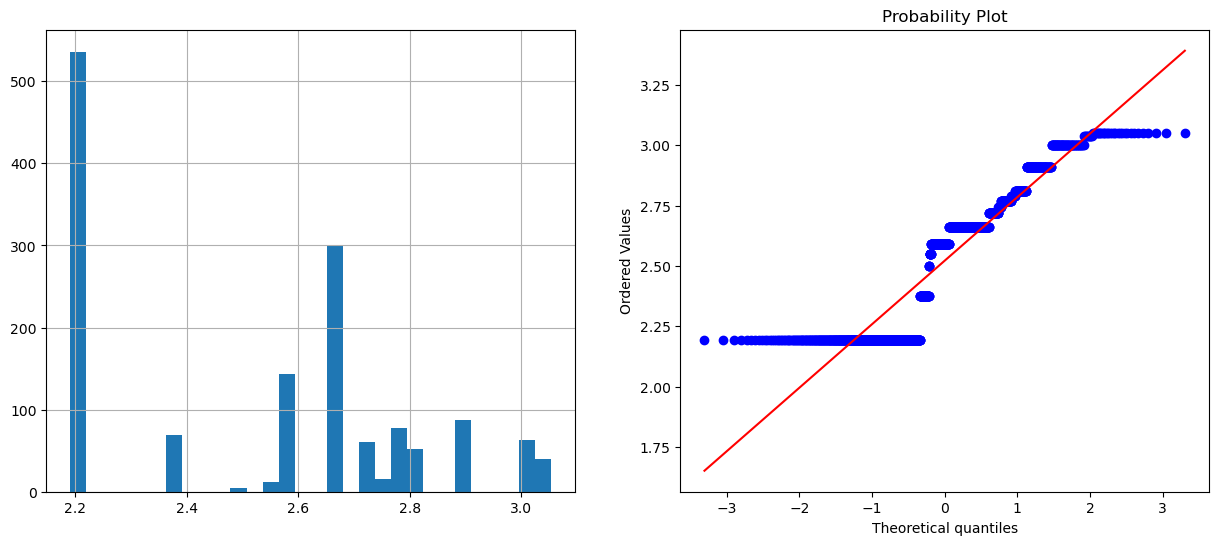

In [45]:
diagnostic_plots(data_t, 'MSSubClass')